In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("diabetes.csv") 

datasets = train_test_split(df.values[:, :-1], df.values[:, -1], train_size=0.7, random_state=278823)

train_data, test_data, train_labels, test_labels = datasets

In [3]:
scaler = StandardScaler()

scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=500, activation='relu')

mlp.fit(train_data, train_labels)

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.8007448789571695
0.7272727272727273


C:\Users\Maciej\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


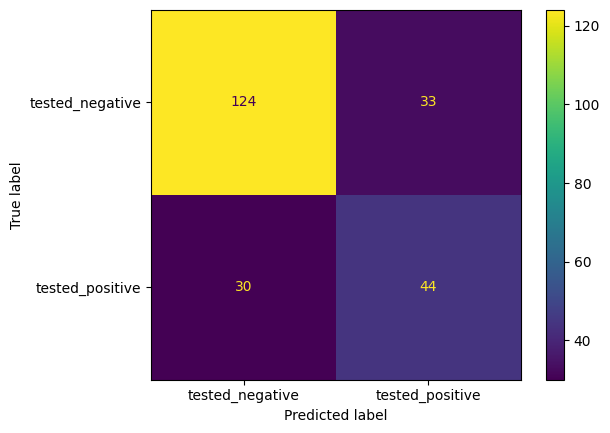

In [5]:
cm = confusion_matrix(test_labels, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()